In [1]:
import sys
from os import getcwd
import os
from os.path import basename, dirname
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import torch
from scipy import stats
import random
import statsmodels
from statsmodels.tsa.seasonal import STL
from statsmodels.tools.eval_measures import rmse
import yfinance as yf
import argparse
import sys



/home/lirannoc/.conda/envs/da/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
import darts
from darts.models import NBEATSModel,BlockRNNModel,RNNModel,ExponentialSmoothing, TCNModel, TransformerModel
from statsmodels.tsa.seasonal import STL
from darts.utils.data import TrainingDataset, PastCovariatesTrainingDataset
from darts.utils.data import PastCovariatesInferenceDataset
from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries
from darts.datasets import AirPassengersDataset, AusBeerDataset
from darts.dataprocessing.transformers.boxcox import BoxCox

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

import da_transformations as da
import da_forecasting
from da_datasets import UnivariateDataset, get_dataset



In [29]:
seed = np.random.randint(low = 0,high = 1000)
print(seed)

datasets = ['AusBeer']
data, seasonality = get_dataset(datasets[0]) 

models = ['RNN','N-BEATS-G','N-BEATS-I','TRANSFORMER','TCN']
#models = ['TCN']
split = 0.7
reps = 1
inlen = 12
outlen = 6

512


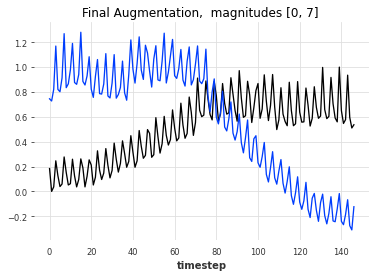

2022-07-28 11:35:34 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:35:34 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:35:34 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:35:34 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:35:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:35:34 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:35:34 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 143.98it/s, loss=0.00357, train_loss=0.0041]  


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


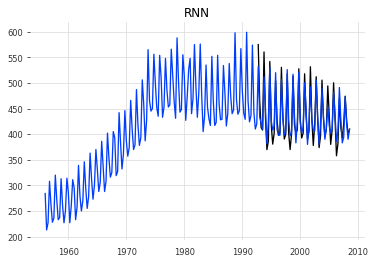

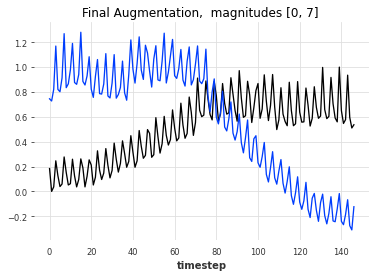

2022-07-28 11:35:48 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:35:48 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:35:48 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:35:48 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:35:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:35:48 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:35:48 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 34.34it/s, loss=0.00244, train_loss=0.00259] 


2022-07-28 11:36:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:36:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:45 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:36:48 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


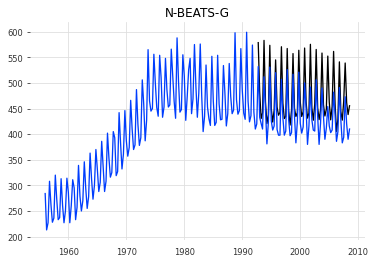

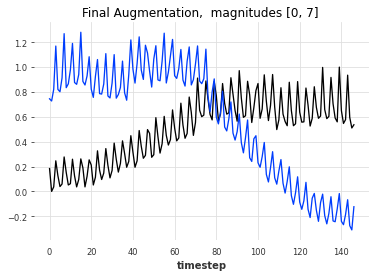

2022-07-28 11:36:49 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:36:49 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:36:49 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:36:49 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:36:49 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:36:49 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:36:49 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 85.72it/s, loss=0.00158, train_loss=0.000803]


2022-07-28 11:37:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


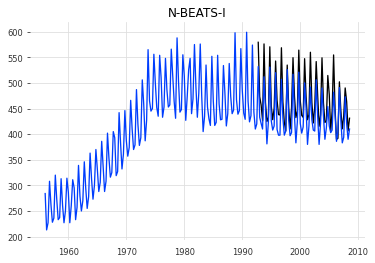

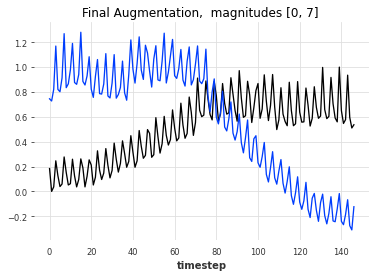

2022-07-28 11:37:12 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:37:12 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:37:12 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:37:12 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:37:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:37:12 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:37:12 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 59.99it/s, loss=0.00267, train_loss=0.00256] 


2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:42 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:43 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


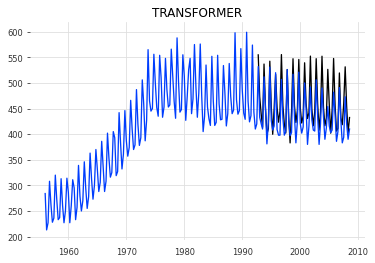

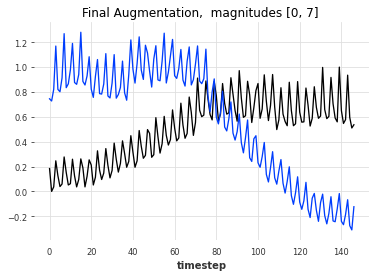

2022-07-28 11:37:44 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-28 11:37:44 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:37:44 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:37:44 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:37:44 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:37:44 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:37:44 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:37:44 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 113.83it/s, loss=0.0132, train_loss=0.014]  


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


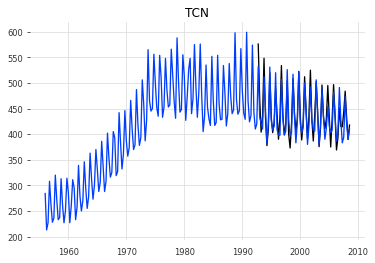

,Dataset,Model,avg MAPE,avg RMSE,avg sMAPE,std MAPE,std RMSE,std sMAPE,n ops,mag,op prob
0,AusBeer,RNN,3.409,18.766,3.411,0.0,0.0,0.0,2,"[0, 7]","[array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,N-BEATS-G,8.924,43.387,8.469,0.0,0.0,0.0,2,"[0, 7]","[array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,N-BEATS-I,7.435,36.699,7.105,0.0,0.0,0.0,2,"[0, 7]","[array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,TRANSFORMER,6.264,32.189,6.008,0.0,0.0,0.0,2,"[0, 7]","[array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,TCN,3.841,20.54,3.793,0.0,0.0,0.0,2,"[0, 7]","[array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]..."


In [30]:
aug_n = 2
aug_m = [0,7]
aug_p = [(np.array(list(da.ranges.keys()))=='Reverse').astype(int),
        (np.array(list(da.ranges.keys()))=='Trend Scale').astype(int)]
mix1_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
mix1_results

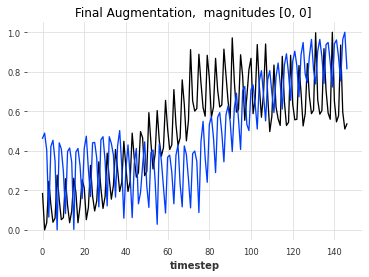

2022-07-28 11:37:59 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:37:59 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:37:59 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:37:59 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:37:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:37:59 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:37:59 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 139.87it/s, loss=0.00238, train_loss=0.00322] 


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:12 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:38:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


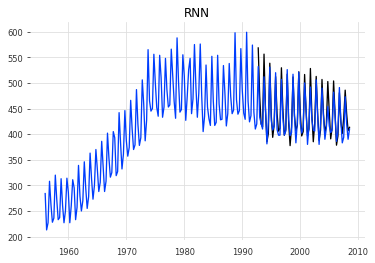

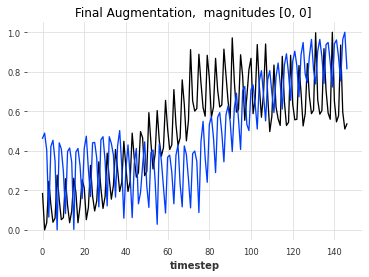

2022-07-28 11:38:14 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:38:14 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:38:14 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:38:14 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:38:14 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:38:14 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:38:14 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 32.53it/s, loss=0.000912, train_loss=0.000694]


2022-07-28 11:39:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:03 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:04 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:08 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:09 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:10 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


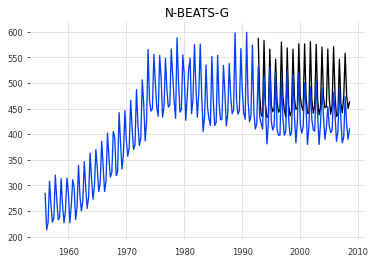

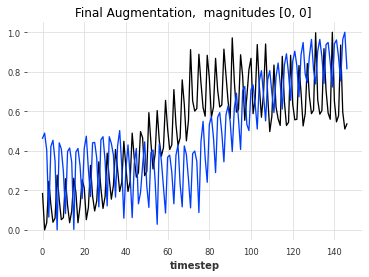

2022-07-28 11:39:11 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:39:11 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:39:11 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:39:11 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:39:11 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:39:11 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:39:11 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 89.94it/s, loss=0.00116, train_loss=0.000729] 


2022-07-28 11:39:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:39:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:39:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


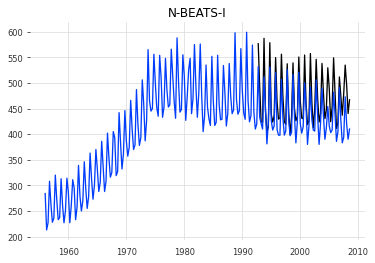

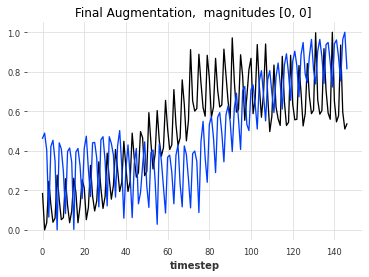

2022-07-28 11:39:35 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:39:35 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:39:35 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:39:35 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:39:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:39:35 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:39:35 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 60.58it/s, loss=0.00182, train_loss=0.00128] 


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:06 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


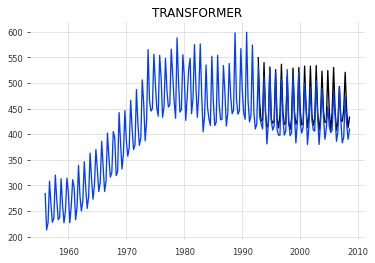

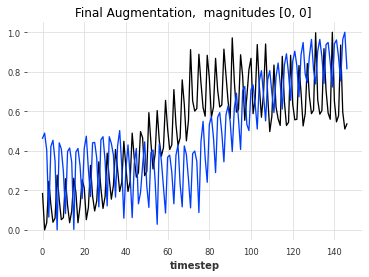

2022-07-28 11:40:07 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-28 11:40:07 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:40:07 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:40:07 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:40:07 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:40:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:40:07 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:40:07 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 139.66it/s, loss=0.00957, train_loss=0.0121] 


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:21 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:22 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


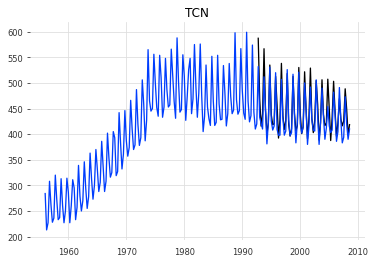

,Dataset,Model,avg MAPE,avg RMSE,avg sMAPE,std MAPE,std RMSE,std sMAPE,n ops,mag,op prob
0,AusBeer,RNN,3.114,17.668,3.059,0.0,0.0,0.0,2,"[0, 0]","[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,N-BEATS-G,10.981,51.527,10.331,0.0,0.0,0.0,2,"[0, 0]","[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,N-BEATS-I,8.128,40.899,7.712,0.0,0.0,0.0,2,"[0, 0]","[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,TRANSFORMER,4.77,24.935,4.609,0.0,0.0,0.0,2,"[0, 0]","[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,TCN,3.692,21.258,3.588,0.0,0.0,0.0,2,"[0, 0]","[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."


In [31]:
aug_n = 2
aug_m = [0,0]
aug_p = [(np.array(list(da.ranges.keys()))=='Flip').astype(int),
        (np.array(list(da.ranges.keys()))=='Reverse').astype(int)]
mix2_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
mix2_results

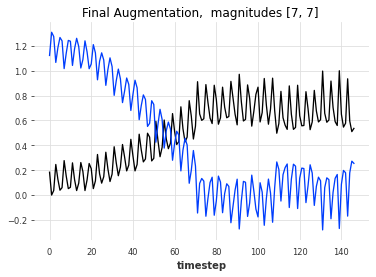

2022-07-28 11:40:23 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:40:23 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:40:23 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:40:23 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:40:23 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:40:23 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:40:23 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 30.5 K


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 140.37it/s, loss=0.00362, train_loss=0.00165] 


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:40:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:40:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


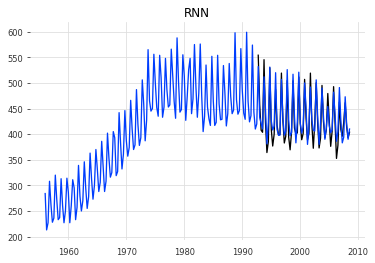

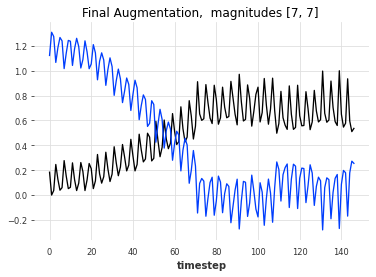

2022-07-28 11:40:37 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:40:37 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:40:37 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:40:37 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:40:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:40:37 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:40:37 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 8.0 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 33.43it/s, loss=0.00104, train_loss=0.00057]  


2022-07-28 11:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:29 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:30 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:34 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:35 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:36 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


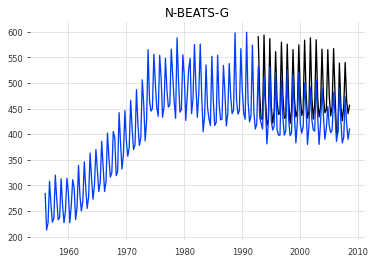

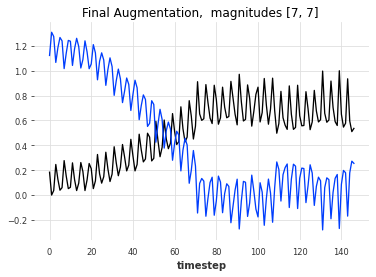

2022-07-28 11:41:37 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:41:37 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:41:37 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:41:37 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:41:37 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:41:37 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:41:37 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.6 M 


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 85.26it/s, loss=0.00115, train_loss=0.0011]   


2022-07-28 11:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:58 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:41:59 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:00 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


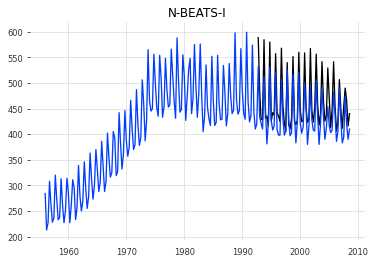

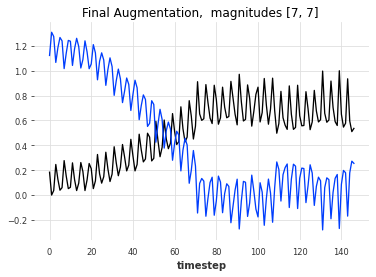

2022-07-28 11:42:01 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:42:01 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:42:01 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:42:01 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:42:01 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:42:01 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:42:01 pytorch_lightning.callbacks.model_summary INFO: 
  | Name                | Type                | Params
------------------------------------------------------------
0 | criterion           | MSELoss             | 0     
1 | train_metrics       | MetricCollection    | 0     
2 | val_metrics         | MetricCollection    | 0     
3

Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 60.49it/s, loss=0.00231, train_loss=0.00376]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:31 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:32 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


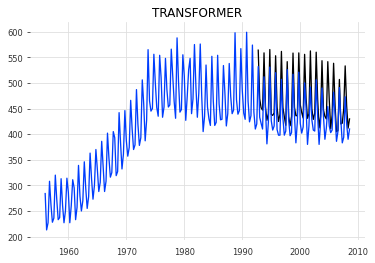

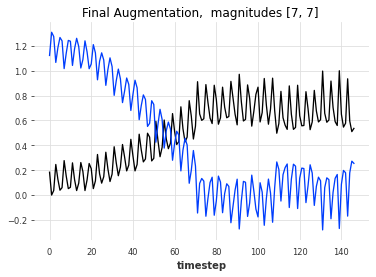

2022-07-28 11:42:33 darts.models.forecasting.tcn_model INFO: Number of layers chosen: 2
2022-07-28 11:42:33 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-07-28 11:42:33 pytorch_lightning.utilities.distributed INFO: GPU available: True, used: True
2022-07-28 11:42:33 pytorch_lightning.utilities.distributed INFO: TPU available: False, using: 0 TPU cores
2022-07-28 11:42:33 pytorch_lightning.utilities.distributed INFO: IPU available: False, using: 0 IPUs
2022-07-28 11:42:33 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-07-28 11:42:33 pytorch_lightning.trainer.connectors.signal_connector INFO: Set SLURM handle signals.
2022-07-28 11:42:33 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 120.95it/s, loss=0.0125, train_loss=0.0117] 


2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:46 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]

2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


2022-07-28 11:42:47 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 9it [00:00, ?it/s]


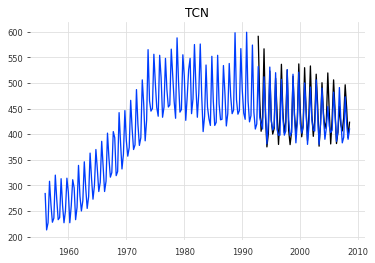

,Dataset,Model,avg MAPE,avg RMSE,avg sMAPE,std MAPE,std RMSE,std sMAPE,n ops,mag,op prob
0,AusBeer,RNN,3.617,18.72,3.67,0.0,0.0,0.0,2,"[7, 7]","[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,N-BEATS-G,10.062,49.027,9.498,0.0,0.0,0.0,2,"[7, 7]","[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,N-BEATS-I,6.996,35.961,6.69,0.0,0.0,0.0,2,"[7, 7]","[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,TRANSFORMER,7.279,36.112,6.957,0.0,0.0,0.0,2,"[7, 7]","[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."
0,AusBeer,TCN,4.021,22.645,3.935,0.0,0.0,0.0,2,"[7, 7]","[array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]..."


In [32]:
aug_n = 2
aug_m = [7,7]
aug_p = [(np.array(list(da.ranges.keys()))=='Flip').astype(int),
        (np.array(list(da.ranges.keys()))=='Trend Scale').astype(int)]
mix3_results = da_forecasting.run(models = models, dataset_names = datasets,
            split=split,
            inlen=inlen, outlen=outlen,
            reps=reps,
            aug_n_ops=aug_n , aug_mag=aug_m, aug_prob=aug_p,
            plot = True,seed = seed)
mix3_results

# Save results

In [33]:
results = []
results.append(mix1_results)
results.append(mix2_results)
results.append(mix3_results)

aug_results = pd.concat(results)
aug_results['seed']  = seed

In [34]:
aug_results.to_excel(datasets[0]+"/seed_"+str(seed)+"_augmix_results1.xlsx")